In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

# Define custom purple/pink pastel palette
custom_palette = ['#c39bd3', '#f5b7b1', '#d7bde2']  # pastel purple, pastel pink, lighter purple



In [38]:
from pathlib import Path

# Start from the notebook folder, go up to project root
base_path = Path.cwd().parent

# Build the correct path to the CSV file
data_path = base_path / "data" / "raw" / "star_classification.csv"

# Load the dataset
df = pd.read_csv(data_path)

In [39]:
df.head(1)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.2753,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171


In [40]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [42]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [43]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [44]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


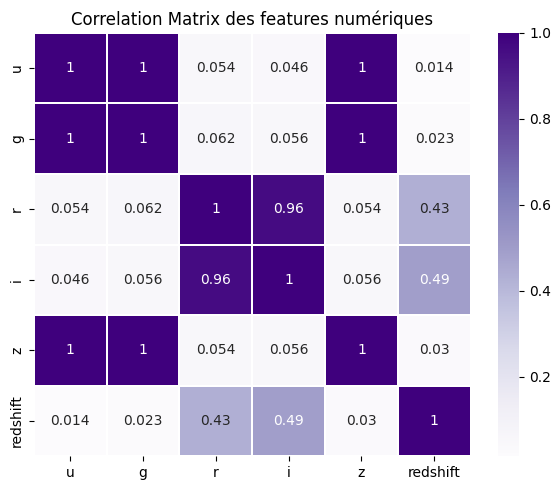

In [45]:

# Select numeric features
numeric_features = ["u", "g", "r", "i", "z","redshift"]
# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(
    corr_matrix,
    annot=True,       # show correlation values
    cmap="Purples",   # purple theme
    linewidths=0.3
)
plt.title("Correlation Matrix des features numériques", fontsize=12)
plt.tight_layout()
plt.show()


In [46]:
key_features = ["u", "g", "r", "i", "z","redshift"]
pivot_table = df.pivot_table(
    index='class', columns=None, values=key_features, aggfunc='mean'
)
pivot_table

,g,i,r,redshift,u,z
class,,,,,,
GALAXY,20.906101,18.851990,19.587552,0.421596,22.587379,18.449156
QSO,20.926193,20.431173,20.624089,1.719676,21.547619,20.266732
STAR,19.153188,18.543736,18.946969,-0.000115,20.689805,17.870400


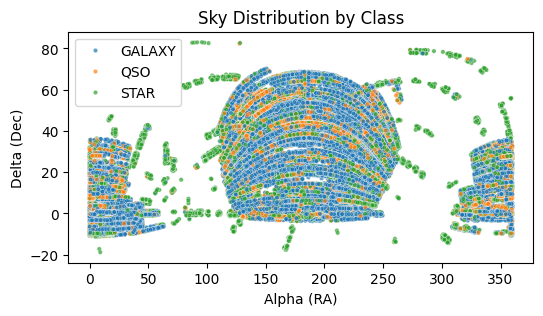

In [47]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x='alpha', y='delta', hue='class', s=10, alpha=0.7)
plt.xlabel('Alpha (RA)')
plt.ylabel('Delta (Dec)')
plt.title('Sky Distribution by Class')
plt.legend()
plt.show()


### feature engineering process 

In [48]:
df['u_g'] = df['u'] - df['g']
df['g_r'] = df['g'] - df['r']
df['r_i'] = df['r'] - df['i']
df['i_z'] = df['i'] - df['z']

In [49]:
class_counts = df['class'].value_counts(normalize=True)
class_counts

class
GALAXY    0.59445
STAR      0.21594
QSO       0.18961
Name: proportion, dtype: float64

In [50]:
df.drop(
        columns=[
            "obj_ID",
            "alpha",
            "delta",
            "run_ID",
            "rerun_ID",
            "cam_col",
            "field_ID",
            "spec_obj_ID",
            "redshift",
            "plate",
            "MJD",
            "fiber_ID",
        ],
        inplace=True,
    )

In [51]:
mapp = {"GALAXY":0, "QSO":1, "STAR":2}
df['class'] = df['class'].map(mapp)

In [52]:
df.head()

,u,g,r,i,z,class,u_g,g_r,r_i,i_z
0,23.87882,22.27530,20.39501,19.16573,18.79371,0,1.60352,1.88029,1.22928,0.37202
1,24.77759,22.83188,22.58444,21.16812,21.61427,0,1.94571,0.24744,1.41632,-0.44615
2,25.26307,22.66389,20.60976,19.34857,18.94827,0,2.59918,2.05413,1.26119,0.40030
3,22.13682,23.77656,21.61162,20.50454,19.25010,0,-1.63974,2.16494,1.10708,1.25444
4,19.43718,17.58028,16.49747,15.97711,15.54461,0,1.85690,1.08281,0.52036,0.43250


For each class individually:

Precision (per class) → Of all objects predicted as this class, how many were correct?

Recall (per class) → Of all actual objects of this class, how many did the model correctly identify?

the  rare class is only 10%.

Usually in astronomy, you care more about recall for rare objects — you want to detect as many quasars as possible.

Precision is still useful, but missing quasars (low recall) is worse than having a few false positives.

In [53]:
X = df.drop(columns=['class'])
y = df['class'] 
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [54]:
def classifications_report_and_confusion_matrix(y_true, y_pred, class_names):
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y )

THRESHOLD = 0.8


### Logistic Regression pipeline

Logistic Regression model accuracy for training data: 76.02%
Logistic Regression model accuracy for test data: 75.70%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     11889
           1       0.66      0.80      0.72      3792
           2       0.68      0.31      0.42      4319

    accuracy                           0.76     20000
   macro avg       0.71      0.67      0.67     20000
weighted avg       0.75      0.76      0.73     20000



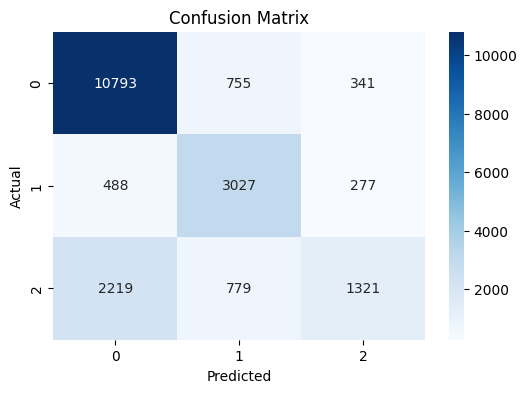

In [56]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics


model1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=10000, random_state=42)
)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_train)

print(f"Logistic Regression model accuracy for training data: {metrics.accuracy_score(y_train, y_pred) * 100:.2f}%"
      )
print(f"Logistic Regression model accuracy for test data: {metrics.accuracy_score(y_test, model1.predict(X_test)) * 100:.2f}%")

classifications_report_and_confusion_matrix(y_test, model1.predict(X_test),["0","1","2"])


### Decision tree classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     11889
           1       0.79      0.79      0.79      3792
           2       0.83      0.73      0.77      4319

    accuracy                           0.87     20000
   macro avg       0.84      0.82      0.83     20000
weighted avg       0.87      0.87      0.87     20000



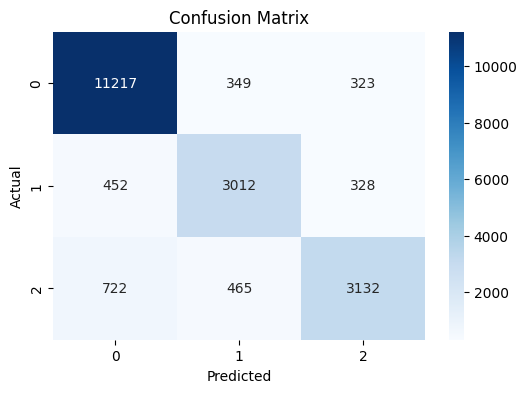

In [57]:
model2_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=10)
model2_gini.fit(X_train, y_train)
classifications_report_and_confusion_matrix(y_test, model2_gini.predict(X_test),["0","1","2"])

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11889
           1       0.76      0.72      0.74      3792
           2       0.65      0.65      0.65      4319

    accuracy                           0.81     20000
   macro avg       0.76      0.75      0.76     20000
weighted avg       0.80      0.81      0.80     20000



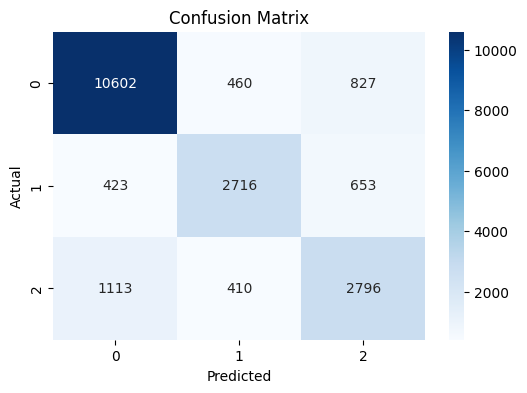

In [58]:
model2_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
model2_entropy.fit(X_train, y_train)
classifications_report_and_confusion_matrix(y_test, model2_entropy.predict(X_test),["0","1","2"]) 

### XGBClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11889
           1       0.82      0.80      0.81      3792
           2       0.84      0.78      0.81      4319

    accuracy                           0.88     20000
   macro avg       0.86      0.84      0.85     20000
weighted avg       0.88      0.88      0.88     20000



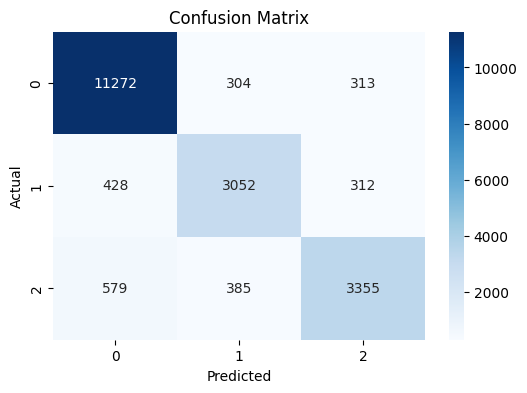

In [59]:

model_3 = XGBClassifier(
    objective='multi:softprob',  # multiclass
    num_class=3,                 # three classes
    learning_rate=0.1,
    max_depth=20,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    gamma=0,
    booster='gbtree',
    tree_method='auto'
)

model_3.fit(X_train, y_train)
classifications_report_and_confusion_matrix(y_test, model_3.predict(X_test),["0","1","2"])

### Final Model Selection: XGBoost

Performance Leader: Achieved 88% accuracy, outperforming Decision Trees (81%) and Logistic Regression (76%).

Precision on Rare Classes: Boosted the Class 2 F1-score to 0.81, a massive jump from the 0.42 achieved by simpler models.

Smart Learning: It builds trees sequentially, specifically correcting the errors of previous ones.

Reliability: Built-in regularization prevents overfitting, making it the most robust choice for  data.

In [63]:
import pickle

import joblib

joblib.dump(model_3, "model.pkl")



['model.pkl']

In [65]:
import os
print(os.path.exists("model.pkl"))  # True if the file exists


True
